# Income Estimates

cleaned by: Abena Bonsu

In [13]:
# imports
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

# 1. Clean Data

In [14]:
# grabbing data from computer
filepath = '/Users/Kofro/Desktop/MedianIncomeEstimates.csv'
df = pd.read_csv(filepath)

# printing different categories
print(df.keys())

Index(['State', 'County', 'Metropolitan area', 'Category', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')


In [15]:
# dropping null/irrelevant data
df = df.dropna()
df = df[['Category', '2007', '2008', '2009', '2010', '2011', '2012']]

# Create Dataframes for Each Income Category

In [16]:
# low income category
lowIncome = df.drop(df.index[0:8]) 
lowIncome = lowIncome.drop(lowIncome.index[8:17])

# very low income category
veryLowIncome = df.tail(n=8) 

# lowest income category
lowestIncome = df.head(8)

In [17]:
print(lowIncome.drop('Category', 1))
print()
print(veryLowIncome.drop('Category', 1))
print()
print(lowestIncome.drop('Category', 1))


      2007    2008    2009    2010    2011    2012
8   39,300  44,250  46,250  44,000  45,850  45,000
9   44,900  50,550  52,900  50,250  52,400  51,400
10  50,550  56,900  59,500  56,550  58,950  57,850
11  56,150  63,200  66,100  62,800  65,500  64,250
12  60,650  68,250  71,400  67,850  70,750  69,400
13  65,150  73,300  76,700  72,850  76,000  74,550
14  69,650  78,350  81,950  77,900  81,250  79,700
15  74,100  83,400  87,250  82,900  86,500  84,850

      2007    2008    2009    2010    2011    2012
17  24,550  27,650  28,900  27,500  28,700  28,150
18  28,100  31,600  33,050  31,400  32,800  32,150
19  31,600  35,550  37,150  35,350  36,900  36,150
20  35,100  39,500  41,300  39,250  40,950  40,150
21  37,900  42,650  44,600  42,400  44,250  43,400
22  40,700  45,800  47,900  45,550  47,550  46,600
23  43,500  49,000  51,200  48,700  50,800  49,800
24  46,350  52,150  54,500  51,850  54,100  53,000

     2007    2008    2009    2010    2011    2012
0  14,750  16,600  17,350  16,

# Pre Visualizations

Before further extraction takes place, analyze the data within each category for different groups

In [18]:
# viewing the housing prices
#lowIncomeGraph = lowIncome.copy(deep=True)
#lowIncomeGraph['2007'] = [x.replace(',', '') for x in lowIncomeGraph['2007']]
#lowIncomeGraph['2007'] = lowIncomeGraph['2007'].astype(float)
#lowIncomeGraph['2007']
##lowIncome['2007'].hist()
#n, bins, patches = plt.hist(lowIncome['2007'], 25, facecolor='orange')


## Extracting Averages Within Years

Create method that will return averages of income price within a certain year. We don't necessarily need to keep the data per year separated out by # of people.

In [19]:
# Method used to return the average of a particular year
def getAverage(dataframe2, string):
        dataframe = dataframe2
        dataframe[string] = [x.replace(',', '') for x in dataframe2[string]]
        dataframe[string] = dataframe[string].astype(float)
        income = dataframe[string].tolist()
        
        inc = 0.0
        for i in range(len(income)):
            inc+=income[i]
        inc = inc/8
        return inc    

In [20]:
# Get the averages for low income throughout the different years
LowI07 = getAverage(lowIncome, '2007')
LowI08 = getAverage(lowIncome, '2008')
LowI09 = getAverage(lowIncome, '2009')
LowI10 = getAverage(lowIncome, '2010')
LowI11 = getAverage(lowIncome, '2011')
LowI12 = getAverage(lowIncome, '2012')

# Create new dataframe to hold this data
df_low = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'],
    index=['Low Income'])
df_low.loc['Low Income'] = pd.Series(
    {'2007':LowI07, '2008':LowI07, 
     '2008':LowI08, '2009':LowI09, 
     '2010':LowI10, '2011':LowI11, 
     '2012':LowI12})

In [21]:
df_low

,2007,2008,2009,2010,2011,2012
Low Income,57556.2,64775,67756.2,64387.5,67150,65875


In [22]:
# Get the averages for low income throughout the different years
VLowI07 = getAverage(veryLowIncome, '2007')
VLowI08 = getAverage(veryLowIncome, '2008')
VLowI09 = getAverage(veryLowIncome, '2009')
VLowI10 = getAverage(veryLowIncome, '2010')
VLowI11 = getAverage(veryLowIncome, '2011')
VLowI12 = getAverage(veryLowIncome, '2012')

# Create new dataframe to hold this data
df_vlow = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'],
    index=['Very Low Income'])

df_vlow.loc['Very Low Income'] = pd.Series(
    {'2007':VLowI07, '2008':VLowI07, 
     '2008':VLowI08, '2009':VLowI09, 
     '2010':VLowI10, '2011':VLowI11, 
     '2012':VLowI12})

In [23]:
df_vlow

,2007,2008,2009,2010,2011,2012
Very Low Income,35975,40487.5,42325,40250,42006.2,41175


In [24]:
# Get the averages for high income throughout the different years
LowestI07 = getAverage(lowestIncome, '2007')
LowestI08 = getAverage(lowestIncome, '2008')
LowestI09 = getAverage(lowestIncome, '2009')
LowestI10 = getAverage(lowestIncome, '2010')
LowestI11 = getAverage(lowestIncome, '2011')
LowestI12 = getAverage(lowestIncome, '2012')

# Create new dataframe to hold this data
df_lowest = pd.DataFrame(columns=['2007',
    '2008','2009','2010', '2011', '2012'], 
    index=['Lowest Income'])

df_lowest.loc['Lowest Income'] = pd.Series(
    {'2007':LowestI07, '2008':LowestI07, 
     '2008':LowestI08, '2009':LowestI09, 
     '2010':LowestI10, '2011':LowestI11, 
     '2012':LowestI12})

In [25]:
df_lowest

,2007,2008,2009,2010,2011,2012
Lowest Income,21581.2,24300,25418.8,24156.2,25181.2,24725


In [26]:
# Merge data sets
df_all = df_low.merge(df_vlow, how='outer')
df_all = df_all.merge(df_lowest, how='outer')
df_all = df_all.rename({0: 'Low Income', 1: 'Very Low Income', 
                        2: 'Lowest Income'})

In [27]:
df_all

,2007,2008,2009,2010,2011,2012
Low Income,57556.25,64775.0,67756.25,64387.50,67150.00,65875.0
Very Low Income,35975.00,40487.5,42325.00,40250.00,42006.25,41175.0
Lowest Income,21581.25,24300.0,25418.75,24156.25,25181.25,24725.0


# 2. Simple Visualizations

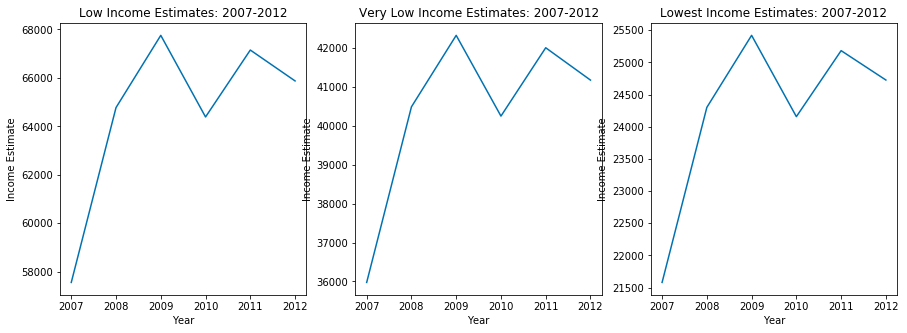

In [28]:
# Display visualization for Low Income Bracket across the years
df_income_all = df_all.copy(deep=True)
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Low Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Low Income'])

# Display visualization for Very Low Income Bracket across the years
plt.subplot(1,3,2)
plt.title('Very Low Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Very Low Income'])


# Display visualization for Lowest Income Bracket across the years
plt.subplot(1,3,3)
plt.title('Lowest Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.plot(df_income_all.T['Lowest Income'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.]),
 array([ 21581.25,  21965.  ,  22348.75,  22732.5 ,  23116.25,  23500.  ,
         23883.75,  24267.5 ,  24651.25,  25035.  ,  25418.75]),
 <a list of 10 Patch objects>)

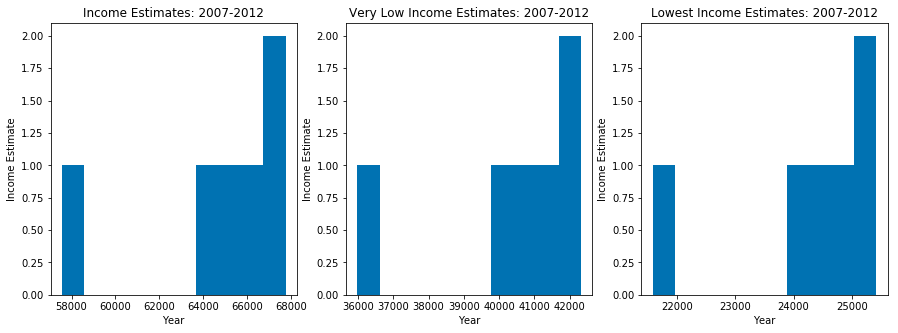

In [29]:
# Display visualization for Low Income Bracket across the years
df_income_all = df_all.copy(deep=True)
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.hist(df_income_all.T['Low Income'])

# Display visualization for Very Low Income Bracket across the years
plt.subplot(1,3,2)
plt.title('Very Low Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.hist(df_income_all.T['Very Low Income'])


# Display visualization for Lowest Income Bracket across the years
plt.subplot(1,3,3)
plt.title('Lowest Income Estimates: 2007-2012')
plt.xlabel('Year')
plt.ylabel('Income Estimate')
plt.hist(df_income_all.T['Lowest Income'])

In [30]:
df_all

,2007,2008,2009,2010,2011,2012
Low Income,57556.25,64775.0,67756.25,64387.50,67150.00,65875.0
Very Low Income,35975.00,40487.5,42325.00,40250.00,42006.25,41175.0
Lowest Income,21581.25,24300.0,25418.75,24156.25,25181.25,24725.0


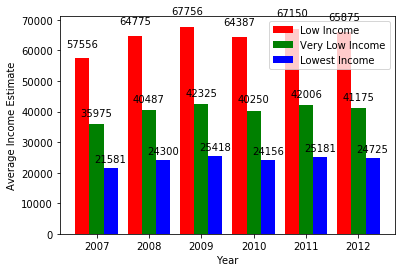

In [31]:
#import numpy as np

N = 6
ind = np.arange(N)
width = 0.27


fig = plt.figure()
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111)


lowIncome = [df_all.T['Low Income'].iloc[0], df_all.T['Low Income'].iloc[1],
            df_all.T['Low Income'].iloc[2], df_all.T['Low Income'].iloc[3],
            df_all.T['Low Income'].iloc[4], df_all.T['Low Income'].iloc[5]]
lowIncomeRect = ax.bar(ind, lowIncome, width, color='r')

veryLowIncome = [df_all.T['Very Low Income'].iloc[0], df_all.T['Very Low Income'].iloc[1],
                df_all.T['Very Low Income'].iloc[2], df_all.T['Very Low Income'].iloc[3],
                df_all.T['Very Low Income'].iloc[4], df_all.T['Very Low Income'].iloc[5]]
veryLowIncomeRect = ax.bar(ind+width, veryLowIncome, width, color='g')

lowestIncome = [df_all.T['Lowest Income'].iloc[0], df_all.T['Lowest Income'].iloc[1],
            df_all.T['Lowest Income'].iloc[2], df_all.T['Lowest Income'].iloc[3],
            df_all.T['Lowest Income'].iloc[4], df_all.T['Lowest Income'].iloc[5]]
lowestIncomeRect = ax.bar(ind+width*2, lowestIncome, width, color='b')

ax.set_ylabel('Average Income Estimate')
ax.set_xlabel('Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2007', '2008', '2009', '2010', '2011', '2012') )
ax.legend( (lowIncomeRect[0], veryLowIncomeRect[0], lowestIncomeRect[0]), 
          ('Low Income', 'Very Low Income', 'Lowest Income') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(lowIncomeRect)
autolabel(veryLowIncomeRect)
autolabel(lowestIncomeRect)

plt.figure(1, figsize=(50,40))
plt.show()